# Authorship Profiling
Environment: Python 3.7.3 and Jupyter notebook

# Introduction

This assessment touches on the steps of Authorship analysis and deals with the classification of texts into classes based on the stylistic choices of their authors. The focus is on author profiling in social media since we are mainly interested in everyday language and how it reflects basic social and personality processes. 

The main aim of this assessment is the conversion of the extracted data into a proper format. We aim to preprocess a set of twitter texts and convert them into numerical representations (which are suitable for input into NLP AI systems, recommender-systems, information-retrieval algorithms, etc.). We then focus on the gender classification task, where we develop a classifier that can assign the set of twitter texts to their corresponding labels by identifying the gender of the tweet’s author as accurately as possible.

In this notebook, the authorship analysis of twitter text data has been carried out to classify the gender ( male or female) of the text authors by using TF-IDF feature selection and the Linear Support Vector Classification (LinearSVC) along with the Bagging Classifier. The accuracy obtained from the Bagging Classifier with the base estimator as LinearSVC has also been provided.


We have been with the following input files:

 - `train_labels.csv` consists of all the training ids and gender for training our model. It contains twitter posts from 3,100 authors and acts as the training data.
 
 - `test_labels.csv` consist of all the labels i.e. gender for testing our model.
 
- `test.csv` consist of all the test data used for testing the model we learned from training data with missing labels i.e., gender. It contains the twitter posts from 500 authors.

- `data.zip` contains 3,600 twitter texts for those authors, which acts as the training and testing data.



This notebook is divided into several tasks:

- The first section of the notebook shows pre-processing and feature extraction.
- The second section shows training our model and calculating accuracy.
- The third section shows testing our model.

# Required Libraries

- `re` - Built-in package in Python for using regular expressions. It is used to check whether a string contains a specified search pattern of a sequence of characters.

- `pandas` - Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.

- `numpy` - NumPy is the fundamental package for array computing with Python.

- `requests` - Python HTTP library that can be used to send all kinds of HTTP requests

- `nltk` - The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP). It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

- `bs4` - Beautiful Soup or bs4 is a Python library for pulling data out of HTML and XML files.

- `zipfile` - This module provides tools to create, read, write, append, and list a ZIP file.

- `stopwords`: Method in nltk package used to remove stop words from nltk data.

- `word_tokenize`: Method in nltk package, used for tokenization.

- `WordNetLemmatizer`: It is used for lemmatization in nltk data.

- `Scikit-learn`: Open source python library with functions to deal with data analysis and data mining.

- `TfidfVectorizer`: A type of vectorizer in sklearn used to transform text into a sparse matrix form.

- `sklearn.metrics`: It is used to calculate the metrics of model accuracy.

- `sklearn.naive_bayes`: It is used to build naive models like Multinomial, Gaussian and Bernoulli Naive Bayes.

- `sklearn.svm`: It is used to build support vector machine models like linearSVC.

- `sklearn.ensemble`:It is used to build the RandomForest Classifier model.

- `sklearn.model_selection`:It is used to do cross validation to check model performance.

- `seaborn`: It is used to make visualizations for the data.

- `matplotlib`: It is used to make visualizations for the data.

In [68]:
import re
import pandas as pd
import numpy as np
import requests

import bs4
from bs4 import BeautifulSoup
import zipfile
from zipfile import ZipFile

import nltk
import nltk.data
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Reading the training and testing csv data

Here the `train_labels.csv`, `test.csv` and `test_labels.csv` are read using the `read_csv()` method of the Pandas library and stored into respective dataframes.
The `data_train` and `data_test` dataframes are concatenated into another dataframe called `data` to carry out the preprocessing tasks later on. The `data_test_label` dataframe is used later while checking the accuracy of the classifier developed.

In [2]:
data_train = pd.read_csv('train_labels.csv')
data_test = pd.read_csv('test.csv')
data = pd.concat([data_train,data_test])
data_test_label = pd.read_csv('test_labels.csv')

The `head()` method is used on the dataframe object `data_train` to display the first 5 rows of the dataset.

In [3]:
data_train.head()

,id,gender
0,d7d392835f50664fc079f0f388e147a0,male
1,ee40b86368137b86f51806c9f105b34b,female
2,919bc742d9a22d65eab1f52b11656cab,male
3,15b97a08d65f22d97ca685686510b6ae,female
4,affa98421ef5c46ca7c8f246e0a134c1,female


The `head()` method is used on the dataframe object `data_test` to display the first 5 rows of the dataset.

In [4]:
data_test.head()

,id,gender,language
0,d6b08022cdf758ead05e1c266649c393,NaN,NaN
1,9a989cb04766d5a89a65e8912d448328,NaN,NaN
2,2a1053a059d58fbafd3e782a8f7972c0,NaN,NaN
3,6032537900368aca3d1546bd71ecabd1,NaN,NaN
4,d191280655be8108ec9928398ff5b563,NaN,NaN


The `head()` method is used on the dataframe object `data_test_label` to display the first 5 rows of the dataset.

In [5]:
data_test_label.head()

,id,gender
0,d6b08022cdf758ead05e1c266649c393,male
1,9a989cb04766d5a89a65e8912d448328,female
2,2a1053a059d58fbafd3e782a8f7972c0,male
3,6032537900368aca3d1546bd71ecabd1,male
4,d191280655be8108ec9928398ff5b563,male


The `len()` method used to check the number of rows in the dataframes below.

In [6]:
len(data_train)

3100

In [7]:
len(data_test)

500

In [8]:
len(data_test_label)

500

The `info()` method is used on the dataframe objects to print a concise summary about the dataframes including the index dtype, column dtypes, non-null values and memory usage.

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3100 non-null   object
 1   gender  3100 non-null   object
dtypes: object(2)
memory usage: 48.6+ KB


Hence, we can see that data_train dataframe consists of training data from the train_labels.csv with 3100 rows and 2 columns where the `id` represents the file name in the given data which contains a set of xml files in it and the `gender` represents the gender of the author.

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        500 non-null    object 
 1   gender    0 non-null      float64
 2   language  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


Hence, we can see that data_test dataframe consists of testing data from the test.csv with 3100 rows and 3 columns where the `id` represents the file name in the given data which contains a set of xml files in it, the `gender` represents the gender of the author which is `null` and the language represents the `language` of the text data which is also `null`.

Hence, it contains only the id details.

In [11]:
data_test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    object
 1   gender  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


Hence, we can see that data_test_label dataframe consists of testing data from the test_labels.csv with 500 rows and 2 columns where the `id` represents the file name in the given data which contains a set of xml files in it and the `gender` represents the gender of the author.

This is used for checking the accuracy and has no missing values.

## Graphical Visualization of the train and test data

The `gender` column of the data_train dataframe is inspected to see the distribution of male and female labels.

In [12]:
train_male = data_train[data_train['gender'] == 'male']
train_female = data_train[data_train['gender'] == 'female']

train_male=train_male.gender.value_counts()
train_female =train_female.gender.value_counts()
print(train_male)
print(train_female)


male    1552
Name: gender, dtype: int64
female    1548
Name: gender, dtype: int64


Hence, we can see that there are 1552 instances of male and 1548 instances of female. Hence, the data is almost identically distributed between both the  label classes.

A bar chart has also been plotted to view the gender label class distribution.

Text(0, 0.5, 'Counts')

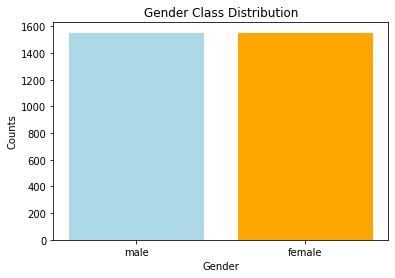

In [14]:
plt.bar(train_male.index.values, train_male, color='lightblue')
plt.bar(train_female.index.values, train_female, color='orange')
plt.title('Gender Class Distribution')
plt.xlabel('Gender')
plt.ylabel('Counts')

The `gender` column of the data_test dataframe is inspected to see the distribution of male and female labels.

In [15]:
true_male = data_test_label[data_test_label['gender'] == 'male']
true_female = data_test_label[data_test_label['gender'] == 'female']

true_male=true_male.gender.value_counts()
true_female =true_female.gender.value_counts()
print(true_male)
print(true_female)

male    248
Name: gender, dtype: int64
female    252
Name: gender, dtype: int64


Hence, we can see that there are 248 instances of male and 252 instances of female. Hence, the data is almost identically distributed between both the  label classes.

A bar chart has also been plotted to view the gender label class distribution.

Text(0, 0.5, 'Counts')

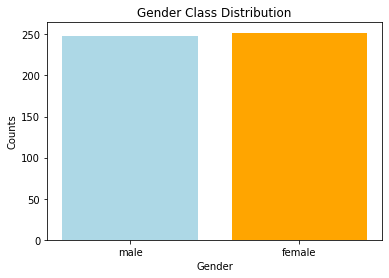

In [16]:
plt.bar(true_male.index.values, true_male, color='lightblue')
plt.bar(true_female.index.values, true_female, color='orange')
plt.title('Gender Class Distribution')
plt.xlabel('Gender')
plt.ylabel('Counts')

# Extracting the data from the data.zip file

The data given in the data.zip file is now extracted. The data given is in xml format. We have been provided with the id values without the `.xml` extension. Hence, we loop over all the data id values in the `data` dataframe which contains both the train and test data and save the id values with a .xml extension for later use in extraction.

In [17]:
list_file =[]
for i in data.id:
    list_file.append(i+'.xml')

The `len()` method used to check the number of entries in the list_file below to check if all the data ids have been succesfully appended into the new list.

In [18]:
len(list_file)

3600

A new list called `list_zip_ext` is created to store the data from the zip files.

The `zipfile.ZipFile('data.zip', 'r')` is used to open the existing data.zip file in reading mode r.
We iterate over all the xml file names from list_file to read the contents from the opened zip file one by one and then appending the xml file data into the new list `list_zip_ext`.



In [19]:
list_zip_ext=[]
zf = zipfile.ZipFile('data.zip', 'r')
for i in list_file:
    data_zip = zf.read("data/"+ i)
    list_zip_ext.append(data_zip)

The `len()` method used to check the number of entries in the `list_zip_ext` below to check if all the data from the xml files have been succesfully appended into the new list.

In [20]:
len(list_zip_ext)

3600

The first entry in the new list is shown below to show the format in which the data has been extracted into the new list.

In [21]:
list_zip_ext[0]

b'<author lang="en">\n\t<documents>\n\t\t<document><![CDATA[@CSIFERROSCAN youch! Good things to know! Is that sort of stuff repairable?]]></document>\n\t\t<document><![CDATA[Succumbed to FOMO and bought GNR tickets. Remember asking parents to buy GNR Lies album as a young boy because it had boobies inside. \xf0\x9f\x98\x82]]></document>\n\t\t<document><![CDATA[Brown eye Broom a cool 73 then to the rescue to clear out some broken window in Wellington @TheACCnz https://t.co/eoYmdswYX5]]></document>\n\t\t<document><![CDATA[Shout out to Auckland tennis fans who get to sleep in this morning but worth it to watch the \xf0\x9f\x90\x90 win #18 #Federer #needcoffee]]></document>\n\t\t<document><![CDATA[@nickyoung210 Someone had some balls to come up with that \xf0\x9f\x98\x82]]></document>\n\t\t<document><![CDATA[@okcthunder Hey guys, are there any more releases coming of the 2016 Christmas day jerseys?]]></document>\n\t\t<document><![CDATA[@JulieReddish Yeah but curiosity got the better of me!

This extracted text data needs to be pre-processed before we can use it to train and test our classifier model.

# Pre-processing 

A function `preprocessing` has been defined to carry out some pre-processing tasks for the extracted data.
A new empty list document has been defined to store the document texts. The instance of `BeautifulSoup(doc, 'html.parser')` is taken as soup. We use `find_all()` to get all the text data without the tags as each line. Then we check if the line is in the bs4 formatted data form within bs4.CData, and then if it is true, it is appended into the list of documents.


In [22]:
def preprocessing(doc):
    document = []
    soup = BeautifulSoup(doc,'html.parser')
 
    for line in soup.find_all(text = True):
        if isinstance(line, bs4.CData):
            document.append(line)
    return document

A new empty list `text` has been defined to store the text for each of the 3600 documents for the training and testing data. We iterate over all the list_zip_ext entries and preprocess the contents one by one and then the pre-processed data is appended into the new list `text`. This list text contains a list of lists for each document. Each list inside the text list contains the sentences in each document separated by commas `,`.


In [23]:
text = []
for item in list_zip_ext:
    txt = preprocessing(item)
    text.append(txt)

The first and second entry of the new text list is shown below to show the format in which the data has been extracted into the new list. We can see each list inside the main list showing the different sentences being separated by commas. The html tags have been sucessfully removed by the `preprocessing` function.

In [24]:
text[0:1]

[['@CSIFERROSCAN youch! Good things to know! Is that sort of stuff repairable?',
  'Succumbed to FOMO and bought GNR tickets. Remember asking parents to buy GNR Lies album as a young boy because it had boobies inside. 😂',
  'Brown eye Broom a cool 73 then to the rescue to clear out some broken window in Wellington @TheACCnz https://t.co/eoYmdswYX5',
  'Shout out to Auckland tennis fans who get to sleep in this morning but worth it to watch the 🐐 win #18 #Federer #needcoffee',
  '@nickyoung210 Someone had some balls to come up with that 😂',
  '@okcthunder Hey guys, are there any more releases coming of the 2016 Christmas day jerseys?',
  '@JulieReddish Yeah but curiosity got the better of me!! 👀',
  '@JulieReddish I rewound and paused. Not one of my best decisions…',
  'Good to see Steve Adams upping the def game since coming back! 4 blks in each game plus a 20-10 in this one. Getting it done big fella!',
  'Sure as eggs though I’m bound to jinx it',
  'Might get an early night tonight 

A new empty list `list_of_text` has been defined to store the text for each of the 3600 documents by joining all the sectences in each list of sentences for each document inside the original `text` list by the separator `.` .

The `join()` method is used all the list values to join the different list items into a string using the `.` character as the separator for the training and testing data by iterating over all the entries in the text list.

We iterate over all the list_zip_ext entries and preprocess the contents one by one and then the pre-processed data is appended into the new list `text`.

The `len()` method used to check the number of entries in the `list_of_text` below to check if all the data from the text list has been joined succesfully and appended into the new list.

In [25]:
list_of_text = []
list_of_text = ['.'.join(x) for x in text]
len(list_of_text)

3600

## Removal of hyper-links from the text

A new empty list `hy_link_rm` has been defined to store the text for each of the 3600 documents after removing the hyper links present in the text by using regex.

The `re.sub()` function from the re module is used to replace the substrings defined by the regex pattern with a specified substring.

In this case, the regex pattern `r"http\S+|www\S+"` has been used to find all the hyperlinks in the data.The regex pattern can be explained as follows:

`r"http` is used to matched the http characters literally in a case sensitive manner. Then, `\S+` matches any non-whitespace character with the `+` indicating that the matches can take place for one to unlimited number of times in a greedy manner for all non white space characters. Then the `www\S+` matches the www characters literally in a case sensitive manner followed by the \S+ matching of the non-whitespace characters in a greedy manner one again.

Hence, we iterate over all the list_of_text entries and then substitute all occurances of hyperlinks matched by the regex pattern `r"http\S+|www\S+"` with a blank space `" "` for each of the 3600 documents and the substituted strings are then appeneded into the new list `hy_link_rm` after the hyperlinks removal.

In [26]:
hy_link_rm = []
for i in list_of_text:
    i = re.sub(r"http\S+|www\S+"," ",i)
    hy_link_rm.append(i)

The `len()` method used to check the number of entries in the `hy_link_rm` list below to check if all the data from the list_of_text list has been succesfully cleaned by removing the hyperlinks and then appended into the new list.

In [27]:
len(hy_link_rm)

3600

A new list `list_id` has been defined to store all the ids from the data dataframe containing both the training and testing data. Another list `list_of_id` is then created to store the ids obtained along with the `.xml` extension.

The `len()` method used to check the number of entries in the `list_of_id` list below to check if the ids from list_id have been succesfully appended with the .xml extension into the new list.

In [28]:
list_id=data['id']
list_of_id=list(list_id + '.xml')
len(list_of_id)

3600

## Creating a dictionary with key as document id and the value as the text data

An empty dictionary `dic_text` is first defined. For each id entry in the `list_of_id` list, and for each text entry in the `hy_link_rm` list after the removal of hyperlinks a new dictionary is created with the ids acting as they `key` and the cleaned text acting as the corresponding `value`. This dictionary is then used for more efficient pre-processing in the latter steps.

In [29]:
dic_text = {} 
for key in list_of_id: 
    for value in hy_link_rm: 
        dic_text[key] = value 
        hy_link_rm.remove(value) 
        break  

The `len()` method used to check the number of entries in the `dic_text` dictionary below to check if the key and values pairs have been succesfully added into the new dictionary for all 3600 documents.

In [30]:
len(dic_text)

3600

## Text Pre-processing

### Tokenization using the RegexTokenizer

A new empty list called `tokens` and a new dictionary called `dictionary` have been defined.

In order to tokenize the words, we are using the `RegexpTokenizer` which is a tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

Here, we define are regex pattern as `r'\w+'` where the `\w+` matches any word character which is same as `[a-zA-Z0-9_]` with the `+` indicating that the matches can take place for one to unlimited number of times in a greedy manner for all word characters.

The `items()` method is used to retun the key-value pairs in the form of a list of tuples. The values are then tokenized.

These new tokenized values are stored in the form of a list in tokens and then the tokenized list is saved as the value in the new dictionary for the corresponding document id as the key.

In [31]:
tokens = []
dictionary = {}
tokenizer = RegexpTokenizer(r'\w+')                  # matching the tokens 
for key,value in dic_text.items():
    tokens = tokenizer.tokenize(value)                                    # Tokenizing the value 
    dictionary[key] = tokens 

The `len()` method used to check the number of entries in the `dictionary` dictionary below to check if the key and values pairs have been succesfully added into the new dictionary for all 3600 documents.

In [32]:
len(dictionary)

3600

### Converting the dictionary values into a list

A new empty list called `dic_list` has been defined. We then iterate over all key value pairs in the dictionary

The `items()` method is used to retun the key-value pairs in the form of a list of tuples and then the value for each tuple is then appended into the new `dic_list`.


In [33]:
dic_list=[]
for key, value in dictionary.items():
    dic_list.append(value)

The `len()` method used to check the number of entries in the `dic_list` list below to check if the values from the key-value pairs have been succesfully added into the new list as a list of lists for each of the 3600 documents.

In [34]:
len(dic_list)

3600

### Removal of Numeric values from the tokens

The `isaplha()` method is used to check if the strings consists of only alphabetic characters.

We iterate over each list of tokens in the lists present in `dic_list` for each of the 3600 documents. For each `messages` or list in the `dic_list` we check for each token `token` in the `messages` list and check if token is a string consisting of only alphabetic characters. Then if this is true, the `token` is kept in the new `list_messages` list.

The `len()` method used to check the number of entries in the `list_messages` list below to check if the removal of non-alphabetic characters have successfully taken place and added into the new list `list_messages` for each of the 3600 documents.

In [36]:
list_messages = [[token for token in messages if token.isalpha()]for messages in dic_list]
len(list_messages)

3600

### Removal of Stopwords

`Stopwords` are the English words which do not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. In order to analyze the text data and build the models, these stopwords might not add much value to the meaning of the documents.

For text classification, where the text is needed to be classified into various categories, removal of stopwords from the given text helps in focusing more on those words which define the meaning of the text. This also helps in decreasing the dataset size thus reducing the time the model takes to train. It also improves the performance of the model as only the meaningful tokens are left which increase the classification accuracy.



Here, the `stopwords.words('english')` is used to find the stopwords from the English dictionary and store them in `stop_words`.

We iterate over each list of tokens in the lists present in `list_messages` for each of the 3600 documents. For each `messages` or list in the `list_messages` we check for each token `token` in the `messages` list and check if token is not present in `stop_words`.  Then if this is true, the `token` which is not a stopword is kept in the updated `list_messages` list.


In [37]:
# remove stop words
stop_words =stopwords.words('english')
list_messages = [[token for token in messages if token not in stop_words] for messages in list_messages]

The `len()` method used to check the number of entries in the `list_messages` list below to check if the removal of stopwords have successfully taken place and added into the updated list `list_messages` for each of the 3600 documents.

In [38]:
len(list_messages)

3600

### Lematization 

`Lemmatization` is the process of converting words to their base form. It is different from stemming as it considers the context of the words and then converts them to their meaningful base form, whereas stemming only removes the last few characters of the word, which often leads to spelling errors and potrays incorrect meanings. Hence, lemmas are actual words wheras stemming may create non-existant words and we chose to lemmatize our tokens.

An instance of the `WordNetLemmatizer()` is created and is then called to lemmatize the tokens passed to it.

We iterate over each list of tokens in the lists present in `list_messages` for each of the 3600 documents. For each `messages` or list in the `list_messages` we check for each token `token` in the `messages` list and then lemmatize each token by calling the instance `lemmatizer` of the `WordNetLemmatizer()`. The lemmatized words are then kept in the updated `list_messages` list.


In [39]:
lemmatizer = WordNetLemmatizer()
list_messages = [[lemmatizer.lemmatize(token) for token in messages] for messages in list_messages]

The `len()` method used to check the number of entries in the `list_messages` list below to check if the lemmatization of tokens have successfully taken place and added into the updated list `list_messages` for each of the 3600 documents.

In [40]:
len(list_messages)

3600

### Removal of stop words after Lemmatization

We again check for stopwords after lemmatization to cross-check that we haven't missed removing any stop-words that may arise after the words are lemmatized to their base form.
The stopwords from the English dictionary `stop_words` that had been stored earlier are again used in this step.

We iterate over each list of tokens in the lists present in `list_messages` for each of the 3600 documents. For each `messages` or list in the `list_messages` we check for each token `token` in the `messages` list and check if token is not present in `stop_words`.  Then if this is true, the `token` which is not a stopword is kept in the updated `list_messages` list.

In [41]:
list_messages = [[token for token in messages if token not in stop_words] for messages in list_messages]

The `len()` method used to check the number of entries in the `list_messages` list below to check if the removal of stopwords have successfully taken place and added into the updated list `list_messages` for each of the 3600 documents.

In [42]:
len(list_messages)

3600

### Creating a new dictionary by combining the two lists of all ids and all text messages

The two lists-`list_id` containing the ids of all the documents and `list_messages` containing the pre-processed text messages of all the documents are then stored into a new dictionary with the ids as the keys and the messages as the values.

The `dict()` constructor is used to build the dictionary directly from the sequences of key-value pairs. The `zip()` function is used to pair the key and value sequences together before forming the dictionary `dic_final`.

In [43]:
dic_final=dict(zip(list_id,list_messages))

The `len()` method used to check the number of entries in the `dic_final` dictionary below to check if the key and values pairs have been succesfully added into the new dictionary for all 3600 documents.

In [44]:
len(dic_final)

3600

### Removing the Tokens with the length 1 from the text

Words of a single character having length one do not add much meaning into a sentence. They can be safely ignored without sacrificing the meaning of the sentences. Hence, in order to analyze the text and build the models, these won't add much value for the meaning of the documents and would help us in focusing more on those words that define the meaning of the text by also decreasing the dataset size and reducing the time taken for training the models. It also improves the performance of the model as only the meaningful tokens are left which increase the classification accuracy.

The `items()` method is used to retun the key-value pairs in the form of a list of tuples. For eah token in the values for each key, if the length of the token is greater than 1, it is stored in the `dic_final` dictionary otherwise it is removed.

In [45]:
for key,value in dic_final.items():
    dic_final[key]=[j for j in value if len(j)>1] 

The `len()` method used to check the number of entries in the `dic_final` dictionary below to check if the key and values pairs have been succesfully added into the new dictionary for all 3600 documents.

In [46]:
len(dic_final)

3600

This `dic_final` is the final dictionary we have obtained after the text-preprocessing tasks have been carried out where the keys represent the document ids and the values the pre-processed token lists for each of the documents.

## Converting the train and test dataframes into lists

The id columns for the train and testing dataframes from the data provided are converted into list form.

The `len()` method used to check the number of entries in both the lists below to check if the the length of each is in accorance to the data provided i.e., the training data consists of 3100 entries and the testing data consists of 500 entries.

In [47]:
train_data_id=data_train['id'].tolist()
len(train_data_id)

3100

In [48]:
test_data_id = data_test['id'].tolist()
len(test_data_id)

500

### Creating separate dictionaries for the training and testing data

The data from the `dic_final` dictionary which consisted of the pre-processed data values corresponding to all 3600 document id keys is then split into 2 dictionaries for training and testing data according to the keys present in the training data and testing data.


Two empty dictionaries `dic_train` and `dic_test` are first defined.

The `items()` method is used to retun the key-value pairs in the form of a list of tuples for the dictionary `dic_final`.

Then for each key in the dictionary, if the key is present in the `train_data_id` list, then the corresponding key and value pairs are stored in the `dic_train` dictionary. Otherwise, the corresponding key and value pairs are stored in the `dic_test` dictionary.

These 2 dictionaries are then used in the latter steps.

In [49]:
dic_train={}
dic_test={}
for key, value in dic_final.items():
    if key in train_data_id:
        dic_train[key] = value
    else:
        dic_test[key] = value

The `len()` method used to check the number of entries in both the dictionaries below to check if the key and values pairs have been succesfully added into the new dictionaries in accordance to the data provided i.e., the `dic_train` dictionary consists of 3100 entries and the `dic_test` dictionary consists of 500 entries.

In [50]:
len(dic_train)

3100

In [51]:
len(dic_test)

500

The `values()` method is used to retun the value from the key-value pairs for the dictionary `dic_train` and it is then converted into list using `list()` method for storing it in `list_of_data_train`

The `len()` method used to check the number of entries in the list `list_of_data_train` below to check if the the length of 
the data entries are in accorance to the data provided i.e., the training data consists of 3100 entries.

In [52]:
list_of_data_train=list(dic_train.values())
len(list_of_data_train)

3100

The `values()` method is used to retun the value from the key-value pairs for the dictionary `dic_test` and it is then converted into list using `list()` method for storing it in `list_of_data_test`

The `len()` method used to check the number of entries in the list `list_of_data_test` below to check if the the length of 
the data entries are in accorance to the data provided i.e., the testing data consists of 500 entries.

In [53]:
list_of_data_test=list(dic_test.values())
len(list_of_data_test)

500

### Updating dataframe with pre-processed messages

The new updated lists `list_of_data_train` and `list_of_data_test` containing the pre-processed data tokens as lists are then used to add new `messages` columns in the training and testing data frames provided.

In [54]:
data_train['messages'] = list_of_data_train
data_test['messages'] = list_of_data_test

The `head()` method is used on the dataframe object `data_train` to display the first 5 rows of the dataset.

In [55]:
data_train.head()

,id,gender,messages
0,d7d392835f50664fc079f0f388e147a0,male,"[CSIFERROSCAN, youch, Good, thing, know, Is, s..."
1,ee40b86368137b86f51806c9f105b34b,female,"[Donald, Menace, ThanksComey, Return, National..."
2,919bc742d9a22d65eab1f52b11656cab,male,"[This, seems, super, sketch, good, true, Is, l..."
3,15b97a08d65f22d97ca685686510b6ae,female,"[Just, text, dad, Saturday, night, plan, weste..."
4,affa98421ef5c46ca7c8f246e0a134c1,female,"[Irrevocably, love, talented, human, proud, to..."


The `head()` method is used on the dataframe object `data_train` to display the first 5 rows of the dataset.

In [56]:
data_test.head()

,id,gender,language,messages
0,d6b08022cdf758ead05e1c266649c393,NaN,NaN,"[JJMSports, odds, stop, whining, go, get, prop..."
1,9a989cb04766d5a89a65e8912d448328,NaN,NaN,"[Bingay, cool, handy, tonight, cashmoney, howb..."
2,2a1053a059d58fbafd3e782a8f7972c0,NaN,NaN,"[The, cynical, manipulation, voter, desire, ho..."
3,6032537900368aca3d1546bd71ecabd1,NaN,NaN,"[cannot, convert, object, Sony, Braavia, happe..."
4,d191280655be8108ec9928398ff5b563,NaN,NaN,"[Cat, Is, Kneading, Maniac, Floppycats, Left, ..."


### Flattening the lists of messages tokens

The 2 lists `list_of_data_train` and `list_of_data_test` containing the pre-processed data tokens as list of lists are then flattened to form one list of strings and is stored as `list_of_train_data` and `list_of_test_data`, respectively.

The `join()` method is used on all the list values `ele` to join the different list items into a string using the ` ` character as the separator for the training and testing data by iterating over all the entries in the text lists.

In [57]:
list_of_train_data= [' '.join(ele) for ele in list_of_data_train]

In [58]:
list_of_test_data= [' '.join(ele) for ele in list_of_data_test]

## TfidfVectorizer

`Vectorization` is the process of turning collections of text documents into numerical feature vectors which the model can process.  

`TfidfVectorizer` is chosen in this case as it considers overall document weightage of words. It weights the word counts on the basis of how often the appear in documents.

`Term Frequency` - count of how many times a unique word appears in each document.
`Document Frequency` - count of how many times the unique token appears in all documents
`Inverse Document Frequency`- measure of how much information a word can provide, i.e., how common or rare the word is when taking all documents into consideration. It is calculated as the logarithmically scaled inverse fraction of the documents that contain the word. 

In `CountVectorizer` on the other hand, the number of times a word appears in the document is only counted which results in it being biased towards the most frequent words and ignores rare words which could have helped in more efficient processing of data.

The parameters that can be changed and used are:

* `lowercase`- True or False
* `min_df`- The minimum document frequency required.
* `max_df`- The maximum document frequency required.
* `ngram_range`- specify the number of words to consider together to form n-grams. The lower and upper boundary of the range of n-values for different n-grams to be extracted needs to be specified.
* `max_features` - The maximum number of features to consider.

In this case, we are specifying the `lowercase = True`, `max_features=18000` to specify that a maximum of 18000 features are used for the vectorized dictionary, `min_df=3` to state that minimum 3 documents need to have the unique words to include them in the vectorized dictionary, `max_df=0.99` to state that mamimum 99% of the documents can have the unique words to include them in the vectorized dictionary  and `ngram_range=(1,3)` to state that unigrams, bigrams and trigrams are used as features of the vector.


In [59]:
vectorizer = TfidfVectorizer(analyzer='word',input='content',
                             max_features=18000,
                             lowercase=True,
                             min_df=3,
                             max_df = 0.99,
                             ngram_range=(1,3))

An instance `le` of the `LabelEncoder` is used to encode the target labels with values between 0 and n_classes-1. Since we have only 2 classes here, they are ecoded as 0 (Female) and 1 (Male)

The data in the `gender` column for the train and test label data frames are encoded using the instance `le` and then `fit_transform()` method to fit to data and then transform it into the encoded labels.

In [60]:
le = LabelEncoder()
data_train["gender"]= le.fit_transform(data_train["gender"])
data_test_label["gender"]= le.fit_transform(data_test_label["gender"])

The `fit_transform()` method to fit to the training data and then transform it into the vector form using the TFIDF vectorizer defined. This is stored as the `train_data`. The labels of the genders for the training data is stored as `train_label`.



In [61]:
train_data = vectorizer.fit_transform(list_of_train_data)
train_label = data_train['gender']

The `transform()` method to transform the testing data into the vector form using the TFIDF vectorizer defined. This is stored as the `test_data`. The actual labels of the genders for the testing data is stored as `test_label`.



In [62]:
test_data = vectorizer.transform(list_of_test_data)
test_label = data_test_label["gender"]

## Classification model

`Bagging Classifier` with the base estimater as `Linear Support Vector Classifier` is taken as our final model to classify the text according to the genders of `male` and `female`.

### Model Training and Validation

10 fold cross validation has been carried out on the training data by spliting the dataset into traning data(90%) and validation data (10%) for each iteration with the 10 different folds.
The accuracy obtained in each fold is stored in a dataframe called `cv_df`.
The accuracies of each of the 10 cross validation steps are calculated using `cross_val_score` and then appended into the `cv_df` dataframe according to the different folds. The dataframe consists of the 3 columns `model_name` (Name of the model), `fold_idx` (fold number for the cross validation performed) and `accuracy` (accuracy obtained for the fold for the model).

In [63]:
model = BaggingClassifier(base_estimator=LinearSVC(penalty='l2', 
                                                   loss='squared_hinge',
                                                   dual=True,
                                                   tol=0.0001,
                                                   C=0.8,
                                                   multi_class='ovr',
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   class_weight=None,
                                                   verbose=0,
                                                   random_state=None,
                                                   max_iter=1500),
                          n_estimators = 50, random_state = 7, bootstrap=True, bootstrap_features=False) 
CV = 10
cv_df = pd.DataFrame(index=range(CV))
entries = []

model_name = model.__class__.__name__
accuracies = cross_val_score(model, train_data, train_label, scoring='accuracy', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

A boxplot has been plotted for the accuracies obtained for each fold for the 10 fold cross validation of the classifier.

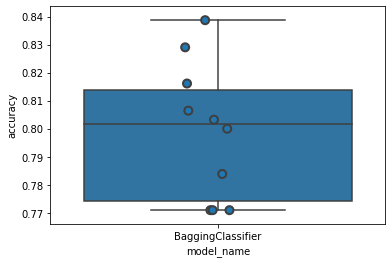

In [64]:

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

Hence, it can be observed that the model performs quite well on the train validation split data with a median value of around 80% accuracy.

### Training the Complete Model

The model is then trained on the entire training data. The `fit()` arguement is used to fit the data on the train_data and train_label values.

Model Parameters:
-	The `penalty` is the regularization term added to the loss function to prevent overfitting. We have used `l2` Ridge regression which reduces the weights of the less important feature vectors.

- `Square hinge` is used when we only want to make binary decisions. We have Square hinge as the `loss functio`n as we are only interested to know if the author is male or female, rather than studying the classification probability, i.e., the probability that the author is male or female.

- The parameter `Dual` is used to specify whether to perform dual or primal optimization. Dual is set to True as the number of features in our dataset outweighs the number of samples.

- The `tol` parameter is used to choose the tolerance for stopping parameter, which is set to 0.0001.
	
- `C` is the regularization parameter which has been set at 0.8. This is inversely proportional to the amount of regularization.

- `Max_iter` sets the number of iterations to be run. Fit_intercept is used to choose whether or not to calculate the intercept for the model. Its default value is True and is set to False only if the data is known to be centered. Intercept_scaling may be used to adjust the effect of regularization. Its default value is 1 and may be increased to reduce the effect of regularization.


In [65]:
BC_SVC = BaggingClassifier(base_estimator=LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.8, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1500), n_estimators = 50, random_state = 7, bootstrap=True, bootstrap_features=False) 
BC_SVC.fit(train_data, train_label)

BaggingClassifier(base_estimator=LinearSVC(C=0.8, class_weight=None, dual=True,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1500,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=7, verbose=0, warm_start=False)

### Testing and predicting the accuracy of the model

The `predict()` arguement is then used to predict the labels for the test_data by using the model fitted on the training data set. The Testing accuracy score for the model is then calculated using `accuracy_score()` by comparing the predicted values to the actual test labels and is then printed.

In [66]:
BC_SVC_predicted = BC_SVC.predict(test_data)
print("Testing accuracy score for the model is:",accuracy_score(test_label, BC_SVC_predicted)*100,'%')

Testing accuracy score for the model is: 82.0 %


The confusion matrix for the predicted labels on comparing with the actual labels has also been found.

In [69]:
BC_con = metrics.confusion_matrix(test_label, BC_SVC_predicted)

The confusion matrix has been plotted below showing the number of correct classification and incorrect classifications for each gender class.

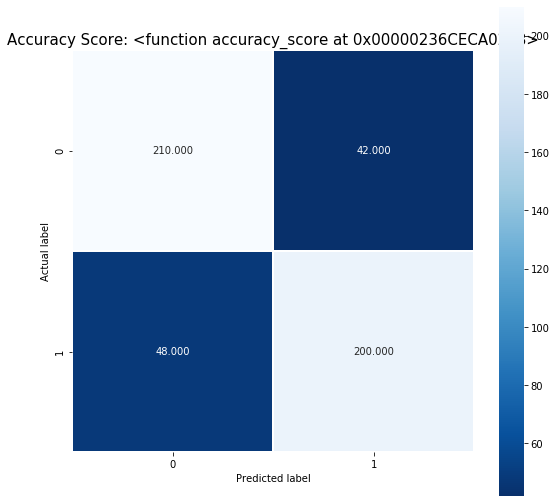

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(BC_con, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15);
plt.show()

Hence, we can see that 210 female i.e., 0 and 200 male i.e., 1 class labels had been corrected classified by using this classifier.

A copy of the test data set called `new_test` is made to store the new predicted labels in order of id.

In [71]:
new_test = data_test.copy()

The label values in the `gender` column are replaced by the new predicted labels found by the model.

In [72]:
new_test['gender'] = BC_SVC_predicted

The columns `language` and `messages` are not required for the final output and hence are dropped from the data frame.

In [73]:
new_test.drop(columns = ['language', 'messages'], inplace = True)

The `gender` label values that had previously been encoded from `male to 1` and `female to 0` are again changed into the original form.

In [74]:
new_test['gender'].replace([0,1],['female','male'],inplace=True)

The `head()` method is used on the dataframe object `new_test` to display the first 5 rows of the final predicted output.

In [75]:
new_test.head()

,id,gender
0,d6b08022cdf758ead05e1c266649c393,male
1,9a989cb04766d5a89a65e8912d448328,female
2,2a1053a059d58fbafd3e782a8f7972c0,male
3,6032537900368aca3d1546bd71ecabd1,male
4,d191280655be8108ec9928398ff5b563,male


The dataframe with these predicted labels are then converted into csv format as `pred_labels.csv` using the `to_csv()` function and without the row index values.

In [76]:
new_test.to_csv("pred_labels.csv", index = False)

# Conclusion


The authorship analysis of twitter text data has been carried out to classify the gender ( male or female) of the text authors by using TF-IDF feature selection and the Linear Support Vector Classification (LinearSVC) along with the Bagging Classifier. The accuracy obtained from the Bagging Classifier with the base estimator as LinearSVC on the entire testing data was found to be `82%`.